In [270]:
from skimage import io
import matplotlib.pyplot as plt
import os

import numpy as np

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


# For the original image
image_hr0 = io.imread('/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/validation/0006_hr.png')
image_hr = io.imread('/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/validation/0006_hr.png')
image_sr = io.imread('/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_sr/sr_0006_hr.png')
image_esr = io.imread('/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_esr/0006_hr.png')

input_hr = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/validation/'
input_sr = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_sr/'
input_esr = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_esr/'
input_bic = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_bic/'

# print(image_hr.shape)
# print(image_sr.shape)

# image_hr = rgb2gray(image_hr)/255 * 100
# image_sr = rgb2gray(image_sr)/255 * 100
# image_esr = rgb2gray(image_esr)/255 * 100

# print(image_hr.shape)
# print(image_sr.shape)

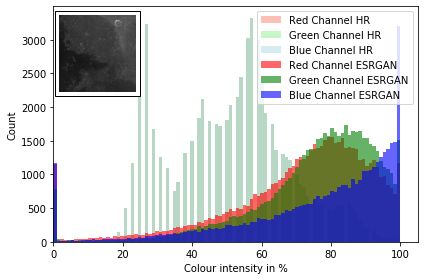

In [278]:

fig, ax = plt.subplots()
bins = np.linspace(0,100,100)
# ax.set_title('Albedo: HR {:.1f}% | SRCNN {:.1f}%'.format(np.mean(image_hr), np.mean(image_sr)))

# ax.hist(image_hr.ravel(), bins = bins, color = 'blue', alpha = 0.3)
ax.hist(image_hr[:, :, 0].ravel(), bins = bins, color = 'salmon', alpha = 0.5)
ax.hist(image_hr[:, :, 1].ravel(), bins = bins, color = 'lightgreen', alpha = 0.5)
ax.hist(image_hr[:, :, 2].ravel(), bins = bins, color = 'lightblue', alpha = 0.5)

# ax.hist(image_esr.ravel(), bins = bins, color = 'orange', alpha = 0.3)
ax.hist(image_esr[:, :, 0].ravel(), bins = bins, color = 'red', alpha = 0.6)
ax.hist(image_esr[:, :, 1].ravel(), bins = bins, color = 'Green', alpha = 0.6)
ax.hist(image_esr[:, :, 2].ravel(), bins = bins, color = 'Blue', alpha = 0.6)

arr_lena = image_hr0
imagebox = OffsetImage(arr_lena, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.12,0.8), xycoords=ax.transAxes)
ax.add_artist(ab)

ax.set_xlabel('Colour intensity in %')
ax.set_ylabel('Count')
ax.set_xlim([0,105])


ax.legend(['Red Channel HR', 'Green Channel HR', 'Blue Channel HR', 'Red Channel ESRGAN', 'Green Channel ESRGAN', 'Blue Channel ESRGAN'])
fig.tight_layout()
fig.savefig('../outputs/histo_rgb_hr_esrgan.png')

In [ ]:
fig, axs = plt.subplots(1, 4)
axs[0].imshow(image_hr[:,:,0])
axs[1].imshow(image_hr[:,:,1])
axs[2].imshow(image_hr[:,:,2])
axs[3].imshow(image_hr[:,:,3])
print(image_hr.shape)

In [84]:
print(len(np.unique(image_hr[:,:,0])))
print(len(np.unique(rgb2gray(image_hr))))
print(image_hr[:,:,0].ravel().shape)
print(rgb2gray(image_hr).ravel().shape)

117
117
(65536,)
(65536,)


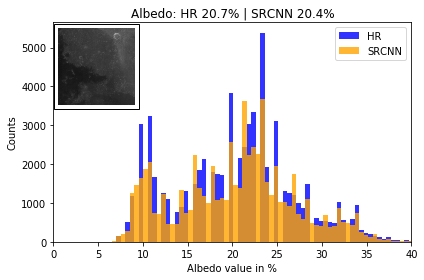

In [268]:
fig, ax = plt.subplots()
bins = np.linspace(0, 100, 200)
ax.set_title('Albedo: HR {:.1f}% | SRCNN {:.1f}%'.format(np.mean(image_hr), np.mean(image_sr)))
ax.hist(image_hr.ravel(), bins = bins, color = 'blue', alpha = 0.8, label='HR')
ax.hist(image_sr.ravel(), bins = bins, color = 'orange', alpha = 0.8, label='SRCNN')

arr_lena = image_hr0
imagebox = OffsetImage(arr_lena, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.12,0.8), xycoords=ax.transAxes)
ax.add_artist(ab)

ax.set_xlabel('Albedo value in %')
ax.set_ylabel('Counts')
ax.set_xlim([0, 40])
ax.legend()
fig.tight_layout()
fig.savefig('../outputs/histo_monochrome_no_esrgan_fixed.png')

# plt.show()

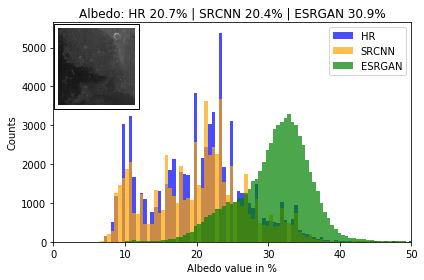

In [256]:
fig, ax = plt.subplots()

bins = np.linspace(0,100,200)
ax.set_title('Albedo: HR {:.1f}% | SRCNN {:.1f}% | ESRGAN {:.1f}%'.format(np.mean(image_hr), np.mean(image_sr), np.mean(image_esr)))
ax.hist(image_hr.ravel(), bins = bins, color = 'blue', alpha = 0.7, label='HR')
ax.hist(image_sr.ravel(), bins = bins, color = 'orange', alpha = 0.7, label='SRCNN')
ax.hist(image_esr.ravel(), bins = bins, color = 'green', alpha = 0.7, label='ESRGAN')
ax.set_xlabel('Albedo value in %')
ax.set_ylabel('Counts')

arr_lena = image_hr0
imagebox = OffsetImage(arr_lena, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.12,0.8), xycoords=ax.transAxes)
ax.add_artist(ab)

ax.set_xlim([0, 50])
ax.legend()
fig.tight_layout()
fig.savefig('../outputs/histo_monochrome_fixed.png')

# plt.show()

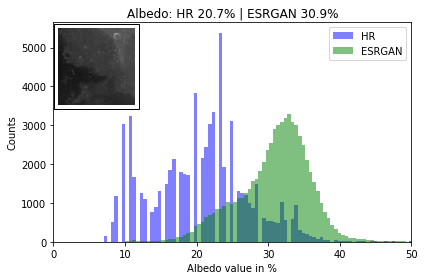

In [257]:
fig, ax = plt.subplots()
bins = np.linspace(0,100,200)
ax.set_title('Albedo: HR {:.1f}% | ESRGAN {:.1f}%'.format(np.mean(image_hr), np.mean(image_esr)))
ax.hist(image_hr.ravel(), bins = bins, color = 'blue', alpha = 0.5, label='HR')
ax.hist(image_esr.ravel(), bins = bins, color = 'green', alpha = 0.5, label='ESRGAN')
ax.set_xlabel('Albedo value in %')
ax.set_ylabel('Counts')
ax.set_xlim([0, 50])

arr_lena = image_hr0
imagebox = OffsetImage(arr_lena, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.12,0.8), xycoords=ax.transAxes)
ax.add_artist(ab)

ax.legend()
fig.tight_layout()
fig.savefig('../outputs/histo_monochrome_esrgan_only_fixed.png')


In [179]:
# Compute the mean for HR, SRCNN and ESRGAN

files = os.listdir(input_sr)
sr_albedo = []
hr_albedo = []
esr_albedo = []
bic_albedo = []

for f in files:
   
    image_sr = io.imread(input_sr + f)
    image_hr = io.imread(input_hr + f.replace('sr_', ''))
    image_esr = io.imread(input_esr + f.replace('sr_', ''))
    image_bic = io.imread(input_bic + f.replace('sr_', '').replace('.png', '_lr.png'))

    image_hr = rgb2gray(image_hr)/255 * 100
    image_sr = rgb2gray(image_sr)/255 * 100
    image_esr = rgb2gray(image_esr)/255 * 100
    image_bic = rgb2gray(image_bic)/255 *100
    # print('Albedo HR: {:.1f}%    Abedo SRCNN: {:.1f}%   Abedo ESRGAN: {:.1f}%'.format(np.mean(image_hr), np.mean(image_sr), np.mean(image_esr)))
    
    
    hr_albedo.append(np.mean(image_hr))
    sr_albedo.append(np.mean(image_sr))
    esr_albedo.append(np.mean(image_esr))
    bic_albedo.append(np.mean(image_bic))


hr_albedo_arr = np.array(hr_albedo)
sr_albedo_arr = np.array(sr_albedo)
esr_albedo_arr = np.array(esr_albedo)
bic_albedo_arr = np.array(bic_albedo)

print(hr_albedo_arr-bic_albedo_arr)
print()
print('SRCNN albedo diff s.d.: {:.3f}'.format(np.std(hr_albedo_arr-sr_albedo_arr)))
print('ESRGAN albedo diff s.d.: {:.3f}'.format(np.std(hr_albedo_arr-esr_albedo_arr)))
print('Bicubic albedo diff s.d.: {:.3f}'.format(np.std(hr_albedo_arr-bic_albedo_arr)))

print()
print('SRCNN albedo diff mean: {:.3f}'.format(np.mean(hr_albedo_arr-sr_albedo_arr)))
print('ESRGAN albedo diff mean: {:.3f}'.format(np.mean(hr_albedo_arr-esr_albedo_arr)))
print('Bicubic albedo diff mean: {:.3f}'.format(np.mean(hr_albedo_arr-bic_albedo_arr)))

print()
print('HR Albedo: {:.1f}'.format(np.mean(hr_albedo)))
print('SRCNN Albedo: {:.1f}'.format(np.mean(sr_albedo)))
print('ESRGAN Albedo: {:.1f}'.format(np.mean(esr_albedo)))

[-0.00026326 -0.00265656  0.00204028  0.00083765 -0.00056242 -0.0030694
 -0.00280016 -0.00819106 -0.00398484 -0.00395492 -0.00274032 -0.00172916
 -0.00285999 -0.00024531 -0.00025728 -0.00107698 -0.00170522 -0.00090945
 -0.00452931 -0.00161547 -0.00265656  0.00222577 -0.0012864   0.0052473
 -0.00312923 -0.00294974 -0.00288991  0.00569006 -0.00627642  0.00032309
 -0.00049661 -0.0024292  -0.00479856 -0.00023335 -0.00160351 -0.00043079
 -0.0114938  -0.00077782  0.00043079 -0.0013582  -0.00044874 -0.00386517
 -0.00519345 -0.00089749  0.00179497  0.00068807  0.00016753 -0.00202832
 -0.00420023 -0.0042481 ]

SRCNN albedo diff s.d.: 0.102
ESRGAN albedo diff s.d.: 3.614
Bicubic albedo diff s.d.: 0.003

SRCNN albedo diff mean: 0.252
ESRGAN albedo diff mean: -8.014
Bicubic albedo diff mean: -0.002

HR Albedo: 24.3
SRCNN Albedo: 24.0
ESRGAN Albedo: 32.3


[-0.00026326 -0.00265656  0.00204028  0.00083765 -0.00056242 -0.0030694
 -0.00280016 -0.00819106 -0.00398484 -0.00395492 -0.00274032 -0.00172916
 -0.00285999 -0.00024531 -0.00025728 -0.00107698 -0.00170522 -0.00090945
 -0.00452931 -0.00161547 -0.00265656  0.00222577 -0.0012864   0.0052473
 -0.00312923 -0.00294974 -0.00288991  0.00569006 -0.00627642  0.00032309
 -0.00049661 -0.0024292  -0.00479856 -0.00023335 -0.00160351 -0.00043079
 -0.0114938  -0.00077782  0.00043079 -0.0013582  -0.00044874 -0.00386517
 -0.00519345 -0.00089749  0.00179497  0.00068807  0.00016753 -0.00202832
 -0.00420023 -0.0042481 ]
[ 0.30634191  0.25248676  0.23042656  0.30175277  0.30178867  0.26454299
  0.25644767  0.23961681  0.28616642  0.31919391  0.26668499  0.23930569
  0.3134141   0.32484807  0.27677274  0.25506554  0.30777191  0.2868545
  0.26566784  0.22844012  0.24169898  0.23046844  0.23937748  0.22080551
  0.28498773  0.35950899  0.23046246  0.20821677  0.02104306  0.32342406
  0.26412417  0.24356575  0.

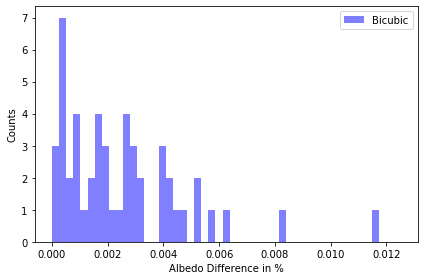

In [223]:
fig, ax = plt.subplots()
bins = np.linspace(0,0.0125,50)
ax.hist(np.absolute(hr_albedo_arr-bic_albedo_arr), bins = bins, color = 'blue', alpha = 0.5, label='Bicubic')
# ax.hist(np.absolute(hr_albedo_arr-sr_albedo_arr), bins = bins, color = 'green', alpha = 0.5, label='SRCNN')
# ax.hist(np.absolute(hr_albedo_arr-esr_albedo_arr), bins = bins, color = 'orange', alpha = 0.5, label='ESRGAN')

# ax.hist((hr_albedo_arr-bic_albedo_arr), bins = bins, color = 'blue', alpha = 0.5, label='Bicubic')
# ax.hist((hr_albedo_arr-sr_albedo_arr), bins = bins, color = 'green', alpha = 0.5, label='SRCNN')
# ax.hist((hr_albedo_arr-esr_albedo_arr), bins = bins, color = 'orange', alpha = 0.5, label='ESRGAN')

ax.set_xlabel('Albedo Difference in %')
ax.set_ylabel('Counts')
#ax.set_xlim([0, 1])
ax.legend()
fig.tight_layout()
fig.savefig('../outputs/histo_bic_diff.png')

print(hr_albedo_arr-bic_albedo_arr)
print(hr_albedo_arr-sr_albedo_arr)
print(hr_albedo_arr-esr_albedo_arr)

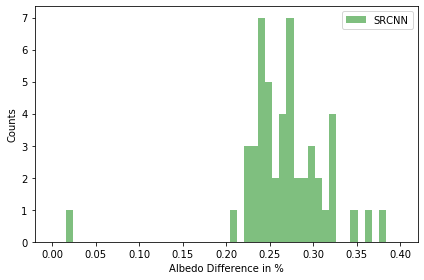

In [221]:
fig, ax = plt.subplots()
bins = np.linspace(0,0.4,50)
# ax.hist(np.absolute(hr_albedo_arr-bic_albedo_arr), bins = bins, color = 'blue', alpha = 0.5, label='Bicubic')
ax.hist(np.absolute(hr_albedo_arr-sr_albedo_arr), bins = bins, color = 'green', alpha = 0.5, label='SRCNN')
# ax.hist(np.absolute(hr_albedo_arr-esr_albedo_arr), bins = bins, color = 'orange', alpha = 0.5, label='ESRGAN')

# ax.hist((hr_albedo_arr-bic_albedo_arr), bins = bins, color = 'blue', alpha = 0.5, label='Bicubic')
# ax.hist((hr_albedo_arr-sr_albedo_arr), bins = bins, color = 'green', alpha = 0.5, label='SRCNN')
# ax.hist((hr_albedo_arr-esr_albedo_arr), bins = bins, color = 'orange', alpha = 0.5, label='ESRGAN')

ax.set_xlabel('Albedo Difference in %')
ax.set_ylabel('Counts')
#ax.set_xlim([0, 1])
ax.legend()
fig.tight_layout()
fig.savefig('../outputs/histo_sr_diff.png')

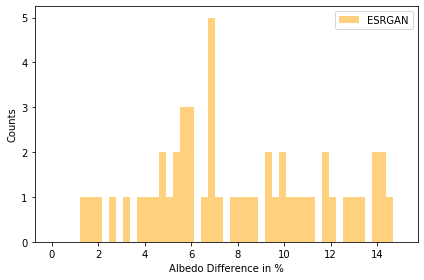

In [224]:
fig, ax = plt.subplots()
bins = np.linspace(0,15,50)
# ax.hist(np.absolute(hr_albedo_arr-bic_albedo_arr), bins = bins, color = 'blue', alpha = 0.5, label='Bicubic')
# ax.hist(np.absolute(hr_albedo_arr-sr_albedo_arr), bins = bins, color = 'green', alpha = 0.5, label='SRCNN')
ax.hist(np.absolute(hr_albedo_arr-esr_albedo_arr), bins = bins, color = 'orange', alpha = 0.5, label='ESRGAN')

# ax.hist((hr_albedo_arr-bic_albedo_arr), bins = bins, color = 'blue', alpha = 0.5, label='Bicubic')
# ax.hist((hr_albedo_arr-sr_albedo_arr), bins = bins, color = 'green', alpha = 0.5, label='SRCNN')
# ax.hist((hr_albedo_arr-esr_albedo_arr), bins = bins, color = 'orange', alpha = 0.5, label='ESRGAN')

ax.set_xlabel('Albedo Difference in %')
ax.set_ylabel('Counts')
#ax.set_xlim([0, 1])
ax.legend()
fig.tight_layout()
fig.savefig('../outputs/histo_esr_diff.png')